# Perkenalan

Dibuat Oleh Arry Pandowo, student Full Stack Data Science Batch 01 Hacktiv8 untuk pemenuhan Graded Challange #06 Phase #01

> ### Data yang digunakan


Data yang digunakan adalah HR Analytics Employee Attrition & Performance dari data [berikut]('https://www.kaggle.com/vjchoudhary7/hr-analytics-case-study/code') yang merupakan data perusahaan XYZ dengan total sekitar 4000 karyawan memiliki Attrition sebesar 15%.

> ### Tujuan yang ingin dicapai


<ol>
<li>melihat hubungan antar feature didalam data, dan menggali insight sebanyak mungkin dari dataset</li>
<li>membuat model prediktif dengan target attrition</li>
<li>mengimplimentasikan praktik semi supervised learning dengan PCA sebagai metode untuk melakukan dimentional reduction dan menentukan metode yang tepat untuk digunakan pada dataset</li>
<ol/>

# Library

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import  metrics
from sklearn.pipeline import Pipeline

# Data Loading

In [2]:
df = pd.read_csv('general_data.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeCount            4410 non-null   int64  
 8   EmployeeID               4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

In [4]:
df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeID                  0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
Over18                      0
PercentSalaryHike           0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

# Data Cleaning

## Drop data Null 

In [5]:
df.dropna(inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4382 entries, 0 to 4408
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4382 non-null   int64  
 1   Attrition                4382 non-null   object 
 2   BusinessTravel           4382 non-null   object 
 3   Department               4382 non-null   object 
 4   DistanceFromHome         4382 non-null   int64  
 5   Education                4382 non-null   int64  
 6   EducationField           4382 non-null   object 
 7   EmployeeCount            4382 non-null   int64  
 8   EmployeeID               4382 non-null   int64  
 9   Gender                   4382 non-null   object 
 10  JobLevel                 4382 non-null   int64  
 11  JobRole                  4382 non-null   object 
 12  MaritalStatus            4382 non-null   object 
 13  MonthlyIncome            4382 non-null   int64  
 14  NumCompaniesWorked      

In [7]:
df.head()

Age Attrition     BusinessTravel              Department  DistanceFromHome  \
0   51        No      Travel_Rarely                   Sales                 6   
1   31       Yes  Travel_Frequently  Research & Development                10   
2   32        No  Travel_Frequently  Research & Development                17   
3   38        No         Non-Travel  Research & Development                 2   
4   32        No      Travel_Rarely  Research & Development                10   

   Education EducationField  EmployeeCount  EmployeeID  Gender  ...  \
0          2  Life Sciences              1           1  Female  ...   
1          1  Life Sciences              1           2  Female  ...   
2          4          Other              1           3    Male  ...   
3          5  Life Sciences              1           4    Male  ...   
4          1        Medical              1           5    Male  ...   

   NumCompaniesWorked Over18 PercentSalaryHike  StandardHours  \
0                 1.0      Y                11              8   
1                 0.0      Y                23              8   
2                 1.0      Y                15              8   
3                 3.0      Y                11              8   
4                 4.0      Y                12              8   

   StockOptionLevel TotalWorkingYears  TrainingTimesLastYear  YearsAtCompany  \
0                 0               1.0                      6               1   
1                 1               6.0                      3               5   
2                 3               5.0                      2               5   
3                 3              13.0                      5               8   
4                 2               9.0                      2               6   

   YearsSinceLastPromotion  YearsWithCurrManager  
0                        0                     0  
1                        1                     4  
2                        0                     3  
3                        7                     5  
4                        0                     4  

[5 rows x 24 columns]

## Drop Data useless

In [8]:
df.drop(['EmployeeCount', 'EmployeeID', 'Over18', 'StandardHours'], axis=1, inplace=True)

Tidak memberikan informasi berarti bagi model dikarenakan : 
* EmployeeCount, Over18 dan StandardHours hanya merupakan perhitungan karyawan dengan jumlah 1 (0 Variance data) 
* EmployeeID merupakan data unique per karyawan

## Checking Label

<AxesSubplot:>

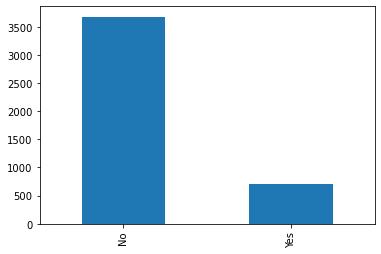

In [9]:
df['Attrition'].value_counts().plot(kind='bar')

Terdapat label imbalance yang akan dilakukan proses resampling sebelum dilakukan training

## Pembagian Feature berdasarkan Jenis Data 

In [10]:
df_numericmix = df.select_dtypes(include = ['int64', 'float64'])

df_cat_str  = df.select_dtypes(include = ['object'])
df_ordinal = df_numericmix[['Education', 'JobLevel', 'StockOptionLevel']]
df_numeric = df_numericmix.drop(['JobLevel', 'StockOptionLevel','Education'], axis=1)

# Eksplorasi Data

## Distribusi data Numerik non kategorik

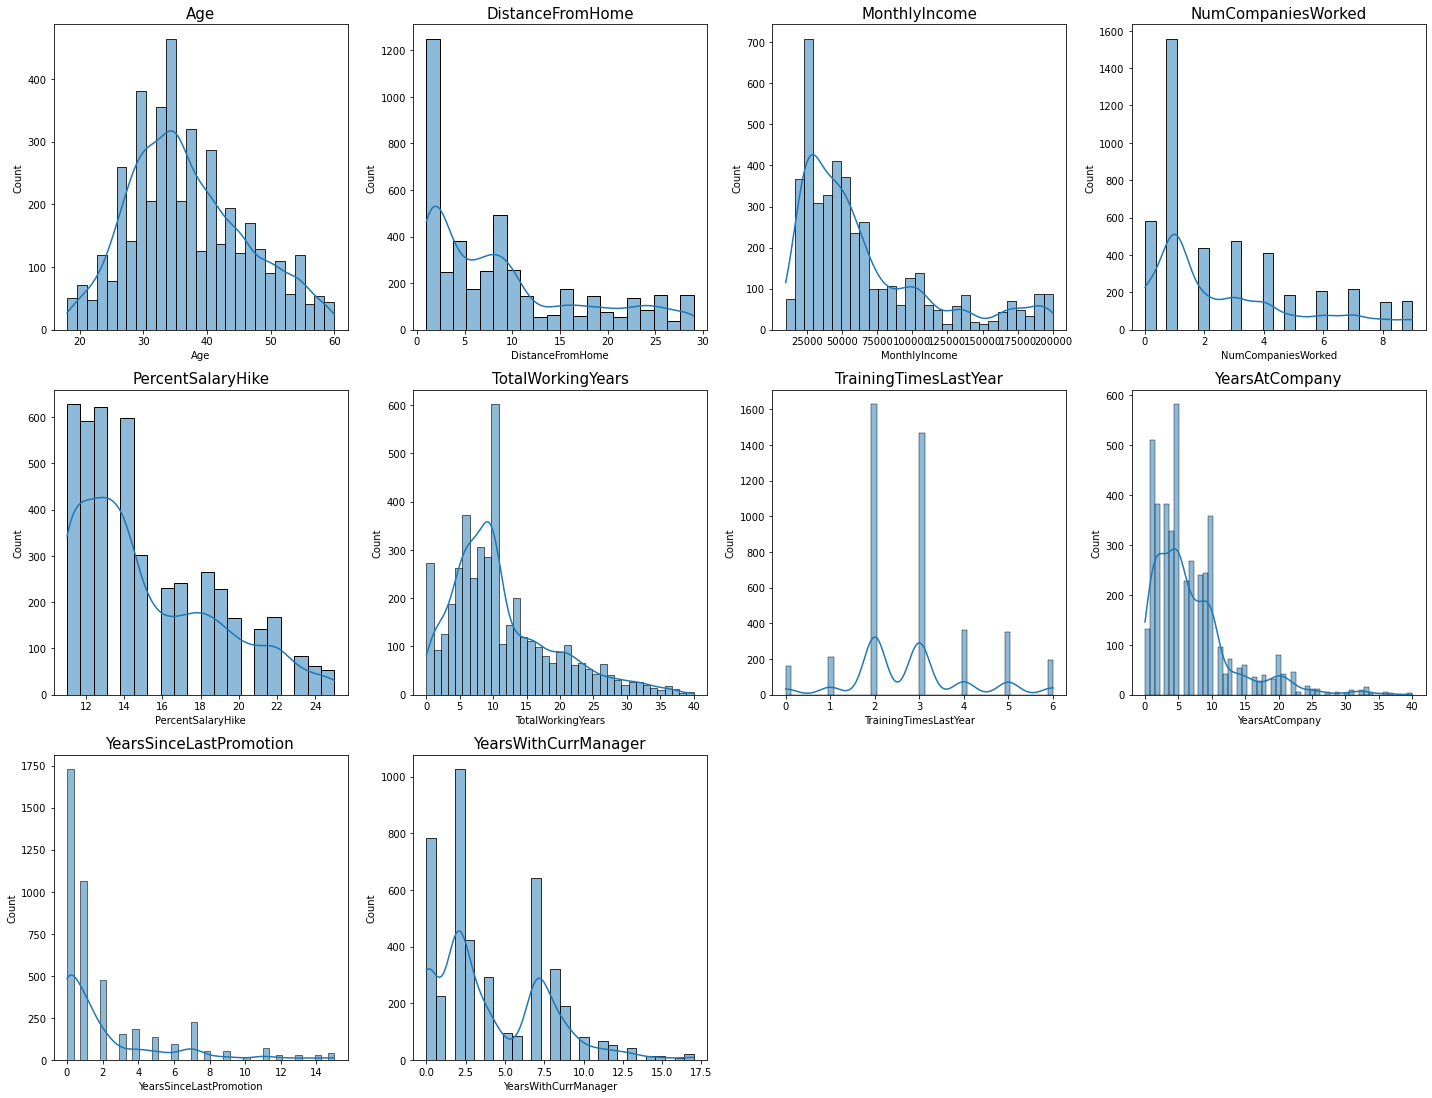

In [11]:
cols = list(df_numeric)
plt.figure(figsize = (20, 20))
for i in range(len(cols)):
    plt.subplot(len(cols)//3+1, 4, i + 1)
    sns.histplot(df_numeric[cols[i]], kde=True)
    plt.title(cols[i], fontsize = 15)
    
plt.tight_layout()
plt.show()

> Terdapat konsentrasi skewness yang cukup ekstrim di Distance From Home, Monthly Income, Number of Companies Work before, Total Working Years, akan di eksplorasi pada tahanpan berikutnya

## Scatterplot monthlyincome to Years at company

<AxesSubplot:xlabel='MonthlyIncome', ylabel='YearsAtCompany'>

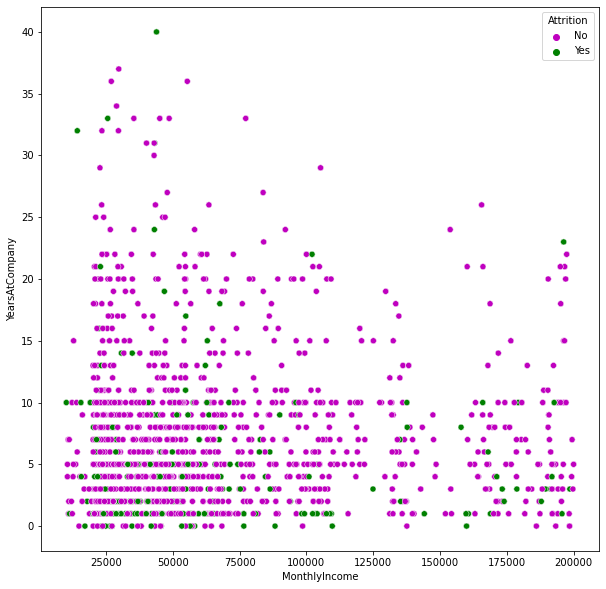

In [12]:
plt.figure(figsize = (10, 10))
sns.scatterplot(x="MonthlyIncome", y="YearsAtCompany",
            hue="Attrition", palette=["m", "g"],
            data=df)

> Konsentrasi Attrition Yes terletak pada Monthly Income rendah dengan masa kerja Years at Company yang masih berada dibawah 25 tahun, semakin tinggi masa kerja seseorang yang diikuti dengan monthly income yang tinggi akan memperkecil kemungkinan seseorang mengalami pada posisi tersebut Attrition 

## Percent Salary Hike to Monthly Income & Working Years

<Figure size 2160x2160 with 0 Axes>

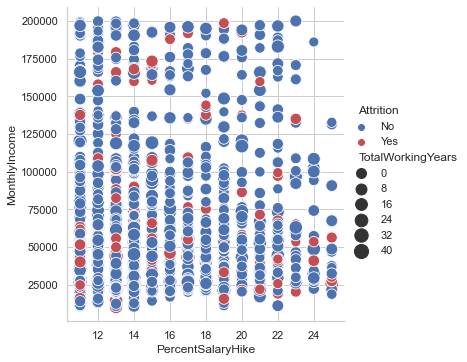

In [13]:
sns.set_theme(style="whitegrid")
fig = plt.figure(figsize = (30, 30))
sns.relplot(
    data=df,
    x="PercentSalaryHike", y="MonthlyIncome",
    hue="Attrition", size="TotalWorkingYears",
    palette=["b", "r"], sizes=(100, 200))

> Hubungan antara personal benefit yang diterima dan lamanya waktu kerja tidak menimbulkan pola khusus antara hal tersebut, hal tersebut menunjukan adanya faktor diluar personal benefit yang menyebabkan timbulnya Attrition pada posisi tertentu

In [14]:
from sklearn import preprocessing
enc = preprocessing.LabelEncoder()

# Data Preprocessing

## Pemisahan per kategori data

In [15]:
df_numericmix = df.select_dtypes(include = ['int64', 'float64'])

df_cat_str  = df.select_dtypes(include = ['object'])
df_ordinal = df_numericmix[['Education', 'JobLevel', 'StockOptionLevel']]
df_numeric = df_numericmix.drop(['JobLevel', 'StockOptionLevel','Education'], axis=1)

## Encode dengan Get Dummies

In [16]:
df_cat_str.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4382 entries, 0 to 4408
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Attrition       4382 non-null   object
 1   BusinessTravel  4382 non-null   object
 2   Department      4382 non-null   object
 3   EducationField  4382 non-null   object
 4   Gender          4382 non-null   object
 5   JobRole         4382 non-null   object
 6   MaritalStatus   4382 non-null   object
dtypes: object(7)
memory usage: 273.9+ KB


In [17]:
df_dummies = pd.get_dummies(data=df , columns=['BusinessTravel', 'Department', 'EducationField', 'JobRole', 'MaritalStatus'])

In [18]:
df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4382 entries, 0 to 4408
Data columns (total 39 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                4382 non-null   int64  
 1   Attrition                          4382 non-null   object 
 2   DistanceFromHome                   4382 non-null   int64  
 3   Education                          4382 non-null   int64  
 4   Gender                             4382 non-null   object 
 5   JobLevel                           4382 non-null   int64  
 6   MonthlyIncome                      4382 non-null   int64  
 7   NumCompaniesWorked                 4382 non-null   float64
 8   PercentSalaryHike                  4382 non-null   int64  
 9   StockOptionLevel                   4382 non-null   int64  
 10  TotalWorkingYears                  4382 non-null   float64
 11  TrainingTimesLastYear              4382 non-null   int64

## Encode dengan Label Encoder

In [19]:
df_dummies['Attrition'] = enc.fit_transform(df_dummies['Attrition'])
df_dummies['Gender'] = enc.fit_transform(df_dummies['Gender'])


## Multicolinearity Test

In [20]:
df_numeric.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4382 entries, 0 to 4408
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4382 non-null   int64  
 1   DistanceFromHome         4382 non-null   int64  
 2   MonthlyIncome            4382 non-null   int64  
 3   NumCompaniesWorked       4382 non-null   float64
 4   PercentSalaryHike        4382 non-null   int64  
 5   TotalWorkingYears        4382 non-null   float64
 6   TrainingTimesLastYear    4382 non-null   int64  
 7   YearsAtCompany           4382 non-null   int64  
 8   YearsSinceLastPromotion  4382 non-null   int64  
 9   YearsWithCurrManager     4382 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 376.6 KB


In [21]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["feature"] = df_numeric.columns
vif_data["VIF"] = [variance_inflation_factor(df_numeric.values, i) for i in range(len(df_numeric.columns))]
vif_data

feature        VIF
0                      Age  20.813640
1         DistanceFromHome   2.254422
2            MonthlyIncome   2.824844
3       NumCompaniesWorked   2.671952
4        PercentSalaryHike  11.329804
5        TotalWorkingYears   8.718431
6    TrainingTimesLastYear   5.122552
7           YearsAtCompany   9.075712
8  YearsSinceLastPromotion   2.400783
9     YearsWithCurrManager   5.711800

## PCA

In [22]:
# scale the DataFrame
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df_PCA_scalled=scaler.fit_transform(df_numeric)

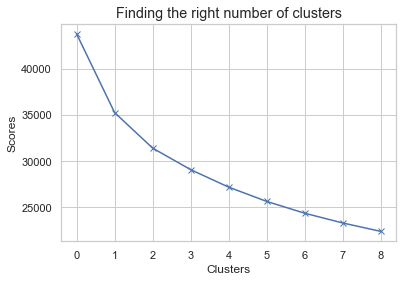

In [23]:
from sklearn.cluster import KMeans

scores_1 = []

range_values = range(1,10)
for i in range_values:
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df_PCA_scalled)
    scores_1.append(kmeans.inertia_)
plt.plot(scores_1, 'bx-')
plt.style.use('ggplot')
plt.title('Finding the right number of clusters')
plt.xlabel('Clusters')
plt.ylabel('Scores') 
plt.show()

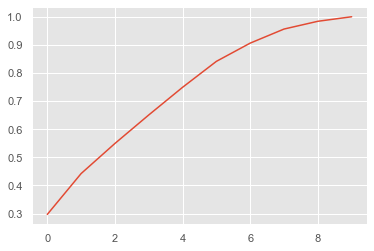

In [24]:
from sklearn.decomposition import PCA
pca=PCA(whiten=True)
pca.fit(df_PCA_scalled)
cumsum = np.cumsum(pca.explained_variance_ratio_)

plt.figure()
plt.plot(cumsum)

berdasarkan kombinasi antara inertia skor cluster diatas dan grafik explained variance ratio, maka dipilih 4 komponen sebagai total reduksi dari 9 feature yang tergabugn didalam df_numerik

In [25]:
X2D=PCA(n_components=4).fit_transform(df_PCA_scalled)
df_PCA_final=pd.DataFrame(data=X2D,columns=["num1","num2", "num3", "num4"])
df_PCA_final.head()

num1      num2      num3      num4
0 -1.459936  0.076337 -2.813392  0.596525
1 -1.011598 -0.881729  1.378494  0.897491
2 -1.170702 -1.021195 -0.235804  1.716581
3  0.956747 -0.554537 -2.157908 -0.187356
4 -0.648029  0.353853  0.352614 -1.231883

## Penggabungan hasil

In [26]:
df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4382 entries, 0 to 4408
Data columns (total 39 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                4382 non-null   int64  
 1   Attrition                          4382 non-null   int32  
 2   DistanceFromHome                   4382 non-null   int64  
 3   Education                          4382 non-null   int64  
 4   Gender                             4382 non-null   int32  
 5   JobLevel                           4382 non-null   int64  
 6   MonthlyIncome                      4382 non-null   int64  
 7   NumCompaniesWorked                 4382 non-null   float64
 8   PercentSalaryHike                  4382 non-null   int64  
 9   StockOptionLevel                   4382 non-null   int64  
 10  TotalWorkingYears                  4382 non-null   float64
 11  TrainingTimesLastYear              4382 non-null   int64

In [27]:
df_dummies = df_dummies.drop(['Age','DistanceFromHome','MonthlyIncome','NumCompaniesWorked','PercentSalaryHike','TotalWorkingYears','TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion','YearsWithCurrManager'], axis=1)

# Pendefinisian Model

In [28]:
df_final = pd.merge(df_dummies, df_PCA_final, left_index=True, right_index=True)

In [53]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4356 entries, 0 to 4381
Data columns (total 33 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Attrition                          4356 non-null   int32  
 1   Education                          4356 non-null   int64  
 2   Gender                             4356 non-null   int32  
 3   JobLevel                           4356 non-null   int64  
 4   StockOptionLevel                   4356 non-null   int64  
 5   BusinessTravel_Non-Travel          4356 non-null   uint8  
 6   BusinessTravel_Travel_Frequently   4356 non-null   uint8  
 7   BusinessTravel_Travel_Rarely       4356 non-null   uint8  
 8   Department_Human Resources         4356 non-null   uint8  
 9   Department_Research & Development  4356 non-null   uint8  
 10  Department_Sales                   4356 non-null   uint8  
 11  EducationField_Human Resources     4356 non-null   uint8

## Feature Selection With Random Forest

### Assigning X & Y

In [30]:
scaler_pipeline = Pipeline([
    ('std_scaler', StandardScaler())
])

In [31]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV

scaler=StandardScaler()
scaler_pipeline.fit(df_final)

X=df_final.drop(['Attrition'], axis=1)
y=df_final['Attrition']
X_train1,X_test1,y_train1,y_test1=train_test_split(X,y,test_size=0.3,random_state=9)

### Fit to Random Forest

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

sel = SelectFromModel(RandomForestClassifier(n_estimators = 100))
sel.fit(X_train1, y_train1)

SelectFromModel(estimator=RandomForestClassifier())

In [33]:
selected_feat= X_train1.columns[(sel.get_support())]
len(selected_feat)
print('Feature yang terpilih', (selected_feat.tolist()))

Feature yang terpilih ['Education', 'JobLevel', 'StockOptionLevel', 'num1', 'num2', 'num3', 'num4']


### Visualisasi Hasil

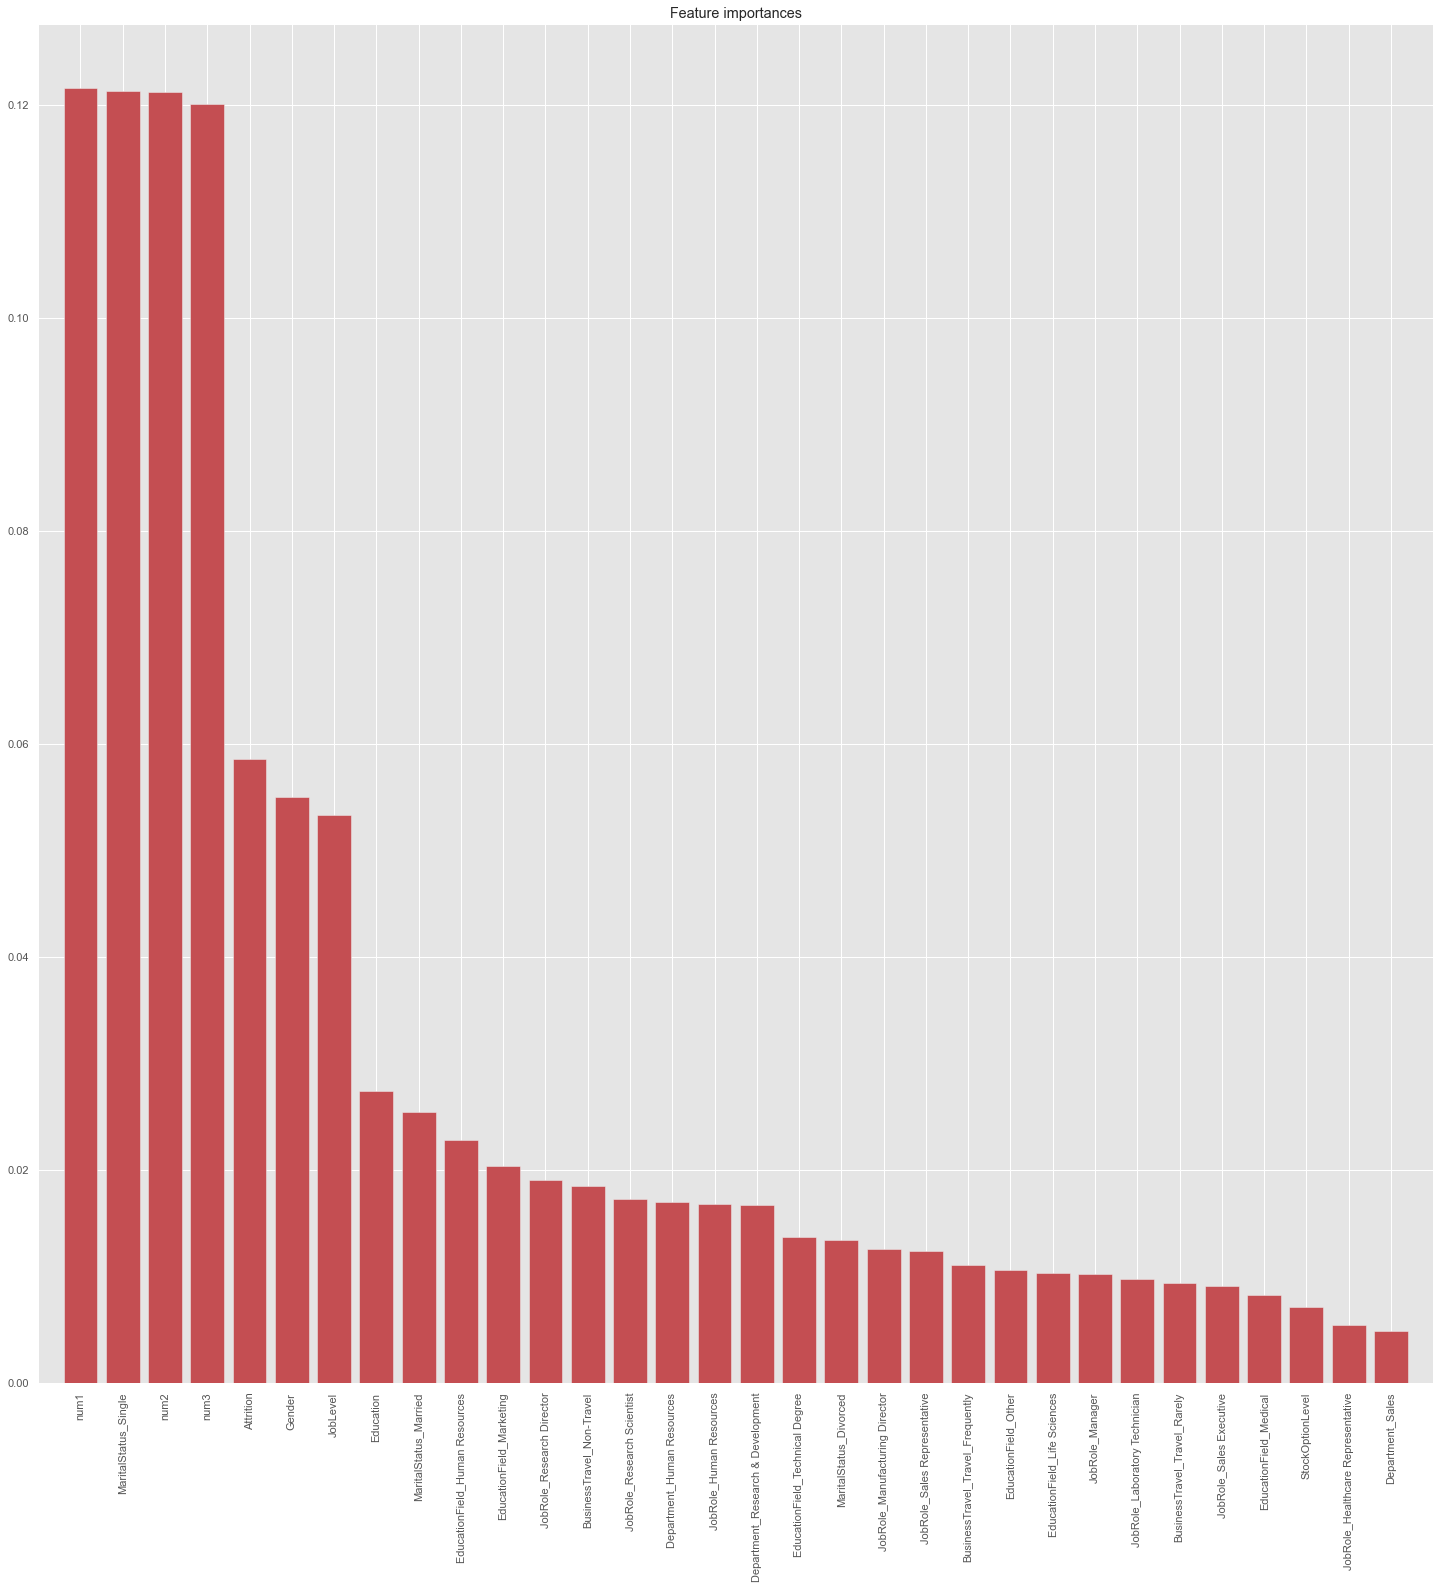

In [34]:
importances = sel.estimator_.feature_importances_
indices = np.argsort(importances)[::-1]
# X is the train data used to fit the model 
plt.figure(figsize = (25, 25))
plt.title("Feature importances")
plt.bar(range(X_train1.shape[1]), importances[indices],
       color="r", align="center")
plt.xticks(range(X_train1.shape[1]), df_final.columns[indices], rotation=90)
plt.xlim([-1, X_train1.shape[1]])
plt.show()

## Assigning X & Y 

In [35]:
X=df_final.drop(['Attrition'], axis=1)
y=df_final['Attrition']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3, stratify=y ,random_state=42)

## Oversampling

<AxesSubplot:>

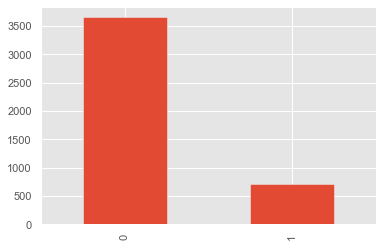

In [36]:
df_final['Attrition'].value_counts().plot(kind='bar')

In [37]:
df_final['Attrition'].value_counts()

0    3655
1     701
Name: Attrition, dtype: int64

In [38]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_train, y_train)

Dilakukan Proses Oversampling Pada 

# Pelatihan Model

In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [40]:
from sklearn import pipeline, metrics

base_LogR = pipeline.make_pipeline(preprocessing.StandardScaler(), LogisticRegression(C=0.1, random_state=1))
base_DF = pipeline.make_pipeline(preprocessing.StandardScaler(), DecisionTreeClassifier(max_depth=4))
base_RF = pipeline.make_pipeline(preprocessing.StandardScaler(), RandomForestClassifier(n_estimators=50, max_depth=4))
base_KNN = pipeline.make_pipeline(preprocessing.StandardScaler(), KNeighborsClassifier(metric='euclidean'))

### Logistic Regression fit & metric report



In [41]:
base_LogR.fit(X_train, y_train)
print(metrics.classification_report(y_test, base_LogR.predict(X_test)))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90      1097
           1       0.39      0.18      0.25       210

    accuracy                           0.82      1307
   macro avg       0.62      0.56      0.57      1307
weighted avg       0.78      0.82      0.79      1307



### DF fit & metric report

In [42]:
base_DF.fit(X_train, y_train)
print(metrics.classification_report(y_test, base_DF.predict(X_test)))

              precision    recall  f1-score   support

           0       0.87      0.72      0.79      1097
           1       0.22      0.42      0.29       210

    accuracy                           0.67      1307
   macro avg       0.55      0.57      0.54      1307
weighted avg       0.76      0.67      0.71      1307



### RF fit & metric report

In [43]:
base_RF.fit(X_train, y_train)
print(metrics.classification_report(y_test, base_RF.predict(X_test)))

              precision    recall  f1-score   support

           0       0.89      0.75      0.81      1097
           1       0.28      0.50      0.36       210

    accuracy                           0.71      1307
   macro avg       0.58      0.63      0.58      1307
weighted avg       0.79      0.71      0.74      1307



### KNN fit & metric feport

In [44]:
base_KNN.fit(X_train, y_train)
print(metrics.classification_report(y_test, base_KNN.predict(X_test)))

              precision    recall  f1-score   support

           0       0.91      0.86      0.88      1097
           1       0.43      0.55      0.48       210

    accuracy                           0.81      1307
   macro avg       0.67      0.71      0.68      1307
weighted avg       0.83      0.81      0.82      1307



# Evaluasi Model

## Grid search CV untuk menentukan hyper parameter

In [45]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV, cross_val_predict


params=[
    {'penalty':['l1','l2'],'solver':['newton-cg','lbfgs'], "class_weight":['balanced', 'balanced_subsample']},
    {'max_depth':[4,5], "class_weight":['balanced', 'balanced_subsample']},
    {'n_estimators':[50,100],'max_depth':[4,5,6], 'criterion' :['gini', 'entropy'], 'max_features' :['auto', 'sqrt', 'log2'], "class_weight":['balanced', 'balanced_subsample']},
    {'weights':['uniform','distance'],'metric':['euclidean','minkowski']}
    
]

grid=[
    GridSearchCV(LogisticRegression(),params[0],scoring='accuracy',cv=5,n_jobs=10),
    GridSearchCV(DecisionTreeClassifier(),params[1],scoring='accuracy',cv=5,n_jobs=10),
    GridSearchCV(RandomForestClassifier(),params[2],scoring='accuracy',cv=5,n_jobs=10),
    GridSearchCV(KNeighborsClassifier(),params[3],scoring='accuracy',cv=5,n_jobs=10),
]

for g in grid:
    g.fit(X_train,y_train)

C:\Users\arryp\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [      nan       nan 0.8292228 0.8292228       nan       nan 0.8294183
 0.8292228]
  warnings.warn(
C:\Users\arryp\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [0.69430997 0.73340779        nan        nan]
  warnings.warn(


In [46]:
models=[
    LogisticRegression(penalty=grid[0].best_params_['penalty'],solver=grid[0].best_params_['solver'],class_weight=grid[0].best_params_['class_weight'],fit_intercept=True),
    DecisionTreeClassifier(max_depth=grid[1].best_params_['max_depth'], class_weight=grid[1].best_params_['class_weight']),
    RandomForestClassifier(n_estimators=grid[2].best_params_['n_estimators'],max_depth=grid[2].best_params_['max_depth'], criterion=grid[2].best_params_['criterion'],max_features=grid[2].best_params_['max_features'], class_weight=grid[2].best_params_['class_weight']),
    KNeighborsClassifier(weights=grid[3].best_params_['weights'],metric=grid[3].best_params_['metric']),
    GaussianNB(),
    ]
   
for mod in models:
    mod.fit(X_train,y_train)
    

In [47]:
from sklearn.metrics import precision_recall_fscore_support,accuracy_score,roc_auc_score,roc_curve,accuracy_score
import matplotlib.pyplot as plt

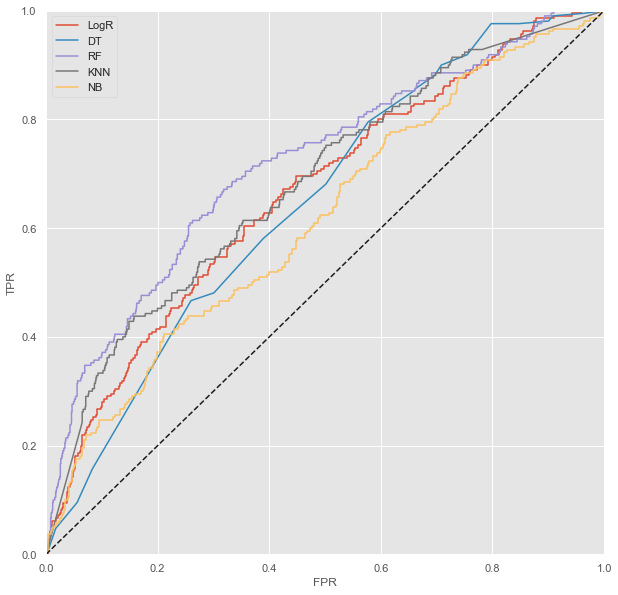

In [48]:
y_pred1=[mod.predict(X_test) for mod in models]
scores1=[mod.predict_proba(X_test)[:,1] for mod in models]
curve=[[roc_curve(y_test,score,pos_label=1)[0],roc_curve(y_test,score,pos_label=1)[1]] for score in scores1]

class_report=pd.DataFrame(index=['precision','recall','f1','support'])
mod_ls=['LogR','DT','RF','KNN','NB']
for i,pred in enumerate(y_pred1):
    metric=np.array(precision_recall_fscore_support(y_test,pred))
    for j,lbl in enumerate(set(df_final['Attrition'].unique())):
        class_report['{}_{}'.format(mod_ls[i],lbl)]=metric[:,j]

fig,ax=plt.subplots(figsize=(10,10))
for i in range(len(models)):
    ax.plot(curve[i][0],curve[i][1],label='{}'.format(mod_ls[i]))
ax.plot([0, 1], [0, 1], 'k--')
ax.set_xlabel('FPR')
ax.set_ylabel('TPR')
ax.axis([0,1,0,1])
ax.legend()

In [49]:
class_report.transpose()

precision    recall        f1  support
LogR_0   0.856672  0.948040  0.900043   1097.0
LogR_1   0.387097  0.171429  0.237624    210.0
DT_0     0.878788  0.740201  0.803563   1097.0
DT_1     0.255875  0.466667  0.330523    210.0
RF_0     0.890799  0.803099  0.844679   1097.0
RF_1     0.320755  0.485714  0.386364    210.0
KNN_0    0.891856  0.608933  0.723727   1097.0
KNN_1    0.231183  0.614286  0.335938    210.0
NB_0     0.865513  0.592525  0.703463   1097.0
NB_1     0.196043  0.519048  0.284595    210.0

# Model Inference

In [50]:
df_inference = pd.read_csv('inference.csv')

In [51]:
models[2].predict(df_inference)

array([0, 1, 0, 1, 1])

Model berhasil memberikan prediksi atas 5 data inference dengan hasil Attrition  0 (No) sebanyak 3 dan Attrition 1 (Yes) sebanyak 2, proporsi prediksi antara No dan Yes akan terus membesar seiring dengan banyaknya jumlah Data inference yang dilakukan didalam Model

# Kesimpulan

## Hasil Model Analysist

> # Random Forest yang terpilih

## Model Terpilih :
Sesuai dengan peruntukannya Random Forest merupakan salah satu model terbaik yang digunakan untuk menghadapi label imbalance dan data outlier. Random Forest memiliki pola pembentukan algoritma, yang melakukan pengambilan keputusan berdasarkan kumpulan kelompok dari "Decision Tree" yang dilanjutkan kepada tahapan selanjutnya hingga depth data mencapai batas yang telah ditentukan atau decision tree telah mencapai putusan paling akhir. Dari hasil perhitungan model yang dipilih pada Class 1 cenderung kecil dikarenakan pada tahapan training dilakukan upaya agar seluruh informasi dari Dataset masuk ke dalam model. Model akan berfungsi jauh lebih baik apabila dilakukan analisis lebih lanjut terhadap Pemilihan Feature menggunakan KBest dengan penetapan scoring threshold. Namun hal tersebut tidak dilakukan dengan harapan model bekerja dengan seluruh yang ada tanpa pengurangan feature dari dataset keseluruhan